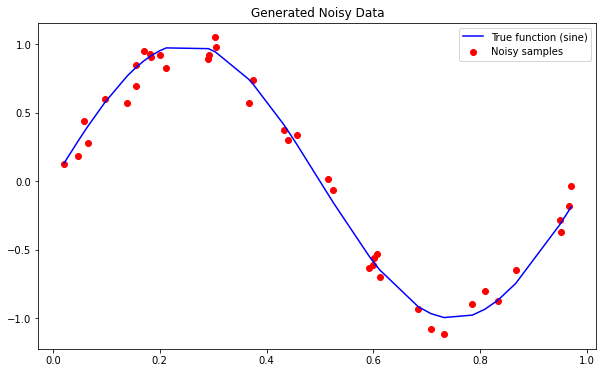

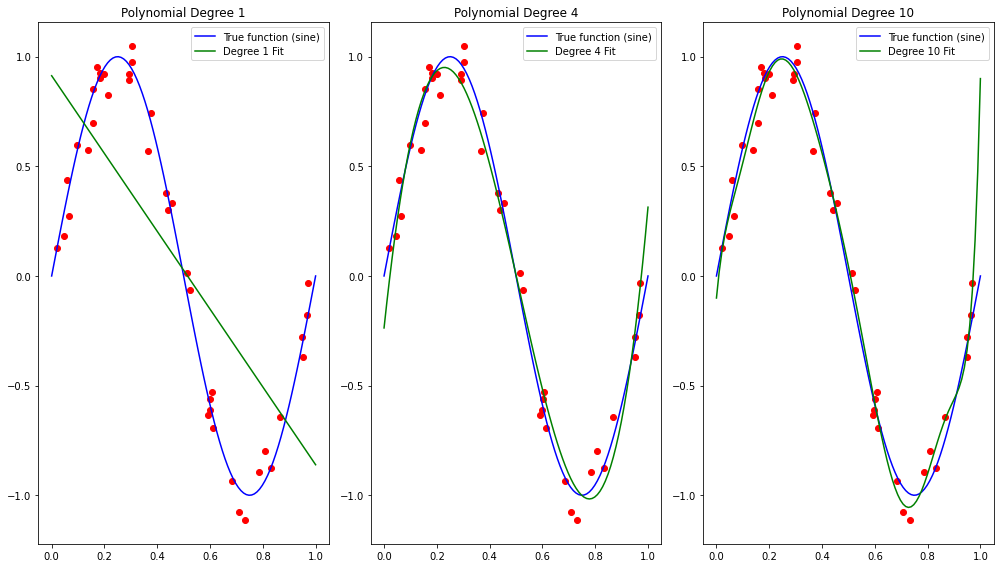

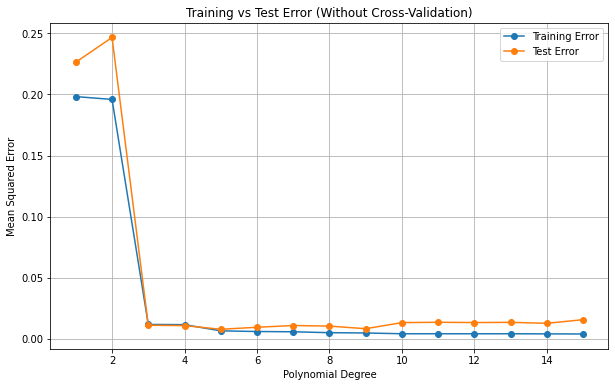

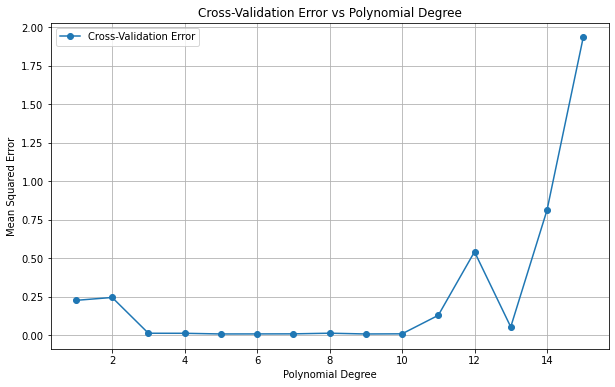

In [10]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# 1. Generate synthetic data (noisy sine wave)
np.random.seed(42)
n_samples = 40
X = np.sort(np.random.rand(n_samples))
y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1

# Plot the original data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Noisy samples", color='red')
plt.plot(X, np.sin(2 * np.pi * X), label="True function (sine)", color='blue')
plt.title("Generated Noisy Data")
plt.legend()
plt.show()

# 2. Train models of varying complexity (underfitting, good fit, overfitting)
degrees = [1, 4, 10]  # Polynomial degrees to show underfitting, balanced, and overfitting

plt.figure(figsize=(14, 8))

for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X[:, np.newaxis], y)
    
    # Predict for plotting
    X_test = np.linspace(0, 1, 100)
    y_pred = model.predict(X_test[:, np.newaxis])
    
    plt.subplot(1, 3, i + 1)
    plt.scatter(X, y, color='red')
    plt.plot(X_test, np.sin(2 * np.pi * X_test), label="True function (sine)", color='blue')
    plt.plot(X_test, y_pred, label=f"Degree {degree} Fit", color='green')
    plt.title(f"Polynomial Degree {degree}")
    plt.legend()

plt.tight_layout()
plt.show()

# 3. Without Cross-Validation: Train and Test Errors for different model complexities
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_errors = []
test_errors = []
degrees_range = np.arange(1, 16)

for degree in degrees_range:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train[:, np.newaxis], y_train)
    
    # Calculate training and test errors
    y_train_pred = model.predict(X_train[:, np.newaxis])
    y_test_pred = model.predict(X_test[:, np.newaxis])
    
    train_errors.append(np.mean((y_train_pred - y_train) ** 2))
    test_errors.append(np.mean((y_test_pred - y_test) ** 2))

# Plot Training and Test Errors (Overfitting vs Underfitting)
plt.figure(figsize=(10, 6))
plt.plot(degrees_range, train_errors, label="Training Error", marker='o')
plt.plot(degrees_range, test_errors, label="Test Error", marker='o')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Training vs Test Error (Without Cross-Validation)")
plt.legend()
plt.grid(True)
plt.show()

# 4. With Cross-Validation: Use cross-validation to estimate model performance
def plot_cv_results(degrees, X, y, cv_splits=5):
    cv = KFold(n_splits=cv_splits, shuffle=True, random_state=42)
    mean_scores = []

    for degree in degrees:
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        # Cross-validation: negative MSE (multiplied by -1 to make it positive)
        scores = cross_val_score(model, X[:, np.newaxis], y, scoring='neg_mean_squared_error', cv=cv)
        mean_scores.append(-scores.mean())
    
    plt.figure(figsize=(10, 6))
    plt.plot(degrees, mean_scores, marker='o', label="Cross-Validation Error")
    plt.xlabel("Polynomial Degree")
    plt.ylabel("Mean Squared Error")
    plt.title(f"Cross-Validation Error vs Polynomial Degree")
    plt.legend()
    plt.grid(True)
    plt.show()

# Cross-validation plot
plot_cv_results(degrees_range, X, y)


In [7]:
/* In the first graph, we are comparing how well our model performs on both the training data and the test data as we make the model more complex by increasing the polynomial degree. 
The training error shows how closely the model fits the data it was trained on. 
As we increase the complexity of the model, the training error keeps going down because a more complex model can fit the training data better and better, even capturing noise. 
However, when we look at the test error—which tells us how well the model performs on new, unseen data—we see a different pattern. 
At first, the test error decreases as the model becomes more complex, but after a certain point, it starts to increase again. 
This is a sign of overfitting, where the model is so complex that it fits not just the important patterns but also the noise and random fluctuations in the training data, leading to poor performance on unseen data. 
This graph highlights the problem of overfitting: while a complex model might look great on the training data, it can actually perform worse on new data.

In the second graph, we introduce cross-validation as a way to measure how well the model generalizes to new data. 
Cross-validation works by splitting the data into several parts, training the model on some of them, and testing it on the rest. 
By doing this across different subsets of the data, we get a better estimate of how well the model will perform on unseen data. In this graph, we see the cross-validation error plotted against the polynomial degree, which helps us understand how model complexity affects generalization. When the model is too simple (low degree), the cross-validation error is high because the model cannot capture the underlying pattern, a situation known as underfitting. As the model becomes more complex, the cross-validation error decreases, indicating the model is learning and generalizing better. However, if we continue to increase the complexity, the cross-validation error eventually rises again, signaling that the model is now overfitting. This happens because the model is becoming too specific to the training data and is no longer generalizing well to new data.
*/
